         dol  inpr  mob  in
0   0.484375     0  1.0  45
1   0.312500     0  0.0  30
2   1.203125     0  0.5  50
3   0.140625     0  1.0  45
4   0.679688     3  2.5  70
5   0.289062     1  0.5  45
6   1.351562     1  2.0  60
7   0.000000     0  4.5  40
8   0.672000     0  3.0  45
9   0.416000     1  2.5  55
10  0.128000     0  1.0  35
11  0.344000     0  0.5  40
12  0.832168     0  4.0  60
13  1.563380     0  2.0  60
14  1.211268     1  0.0  35
15  0.352113     1  0.5  60
16  0.422535     1  0.0  30
17  0.683099     1  0.0  35
18  0.352113     0  3.0  40
19  0.420000     1  0.5  50
20  0.420000     0  0.5  55
21  1.110000     0  0.0  50
22  0.390000     0  0.0  40
23  1.690000     0  0.0  50
24  0.400000     1  1.0  50
25  0.825000     0  1.0  55


,dol,inpr,mob,in
0,0.484375,0,1.0,45
1,0.312500,0,0.0,30
2,1.203125,0,0.5,50
3,0.140625,0,1.0,45
4,0.679688,3,2.5,70
5,0.289062,1,0.5,45
6,1.351562,1,2.0,60
7,0.000000,0,4.5,40
8,0.672000,0,3.0,45
9,0.416000,1,2.5,55


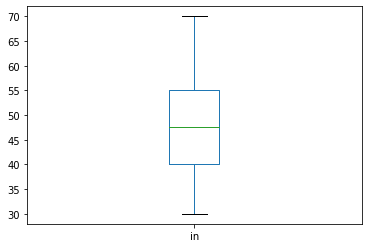

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('var3.csv', names=['dol', 'inpr', 'mob', 'in'])
print(df.head(100))
df['in'].plot.box()
df.head(100)

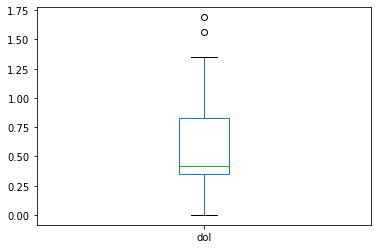

In [182]:
df['dol'].plot.box()

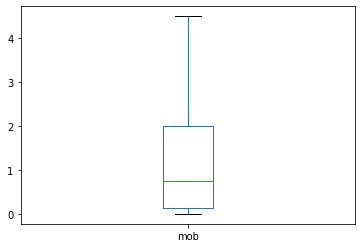

In [183]:
df['mob'].plot.box()

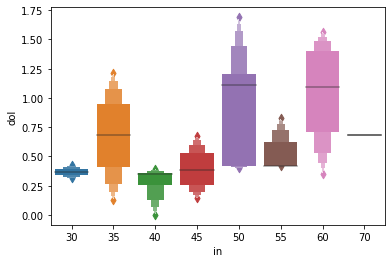

In [184]:
sns.boxenplot(x=df['in'], y=df['dol'])

In [0]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
dataset2= df >(Q3 + 1.5 * IQR)
dataset3 = df<(Q1 - 1.5 * IQR)
df.drop(dataset2[dataset2['dol'] == True].index, inplace=True)
df.drop(dataset3[dataset3['dol'] == True].index, inplace=True)
df.drop(dataset2[dataset2['mob'] == True].index, inplace=True)
df.drop(dataset3[dataset3['mob'] == True].index, inplace=True)
df.drop(dataset2[dataset2['in'] == True].index, inplace=True)
df.drop(dataset3[dataset3['in'] == True].index, inplace=True)
df.drop(dataset2[dataset2['inpr'] == True].index, inplace=True)
df.drop(dataset3[dataset3['inpr'] == True].index, inplace=True)

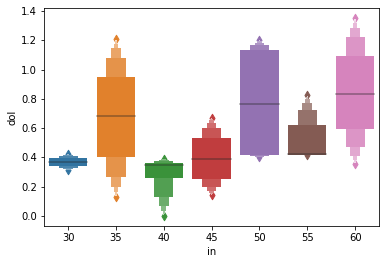

In [186]:
sns.boxenplot(x=df['in'], y=df['dol'])

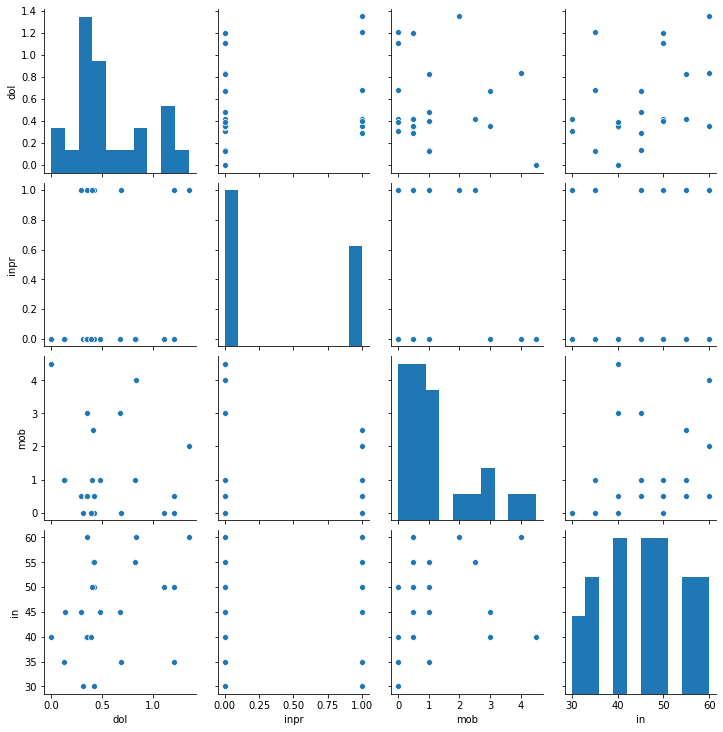

In [187]:
sns.pairplot(df)

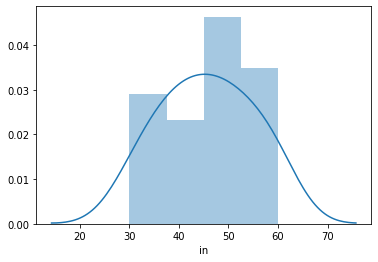

In [188]:
sns.distplot(df['in'])

In [189]:
df.corr()

,dol,inpr,mob,in
dol,1.000000,0.135876,-0.123183,0.332764
inpr,0.135876,1.000000,-0.242965,0.089138
mob,-0.123183,-0.242965,1.000000,0.291186
in,0.332764,0.089138,0.291186,1.000000


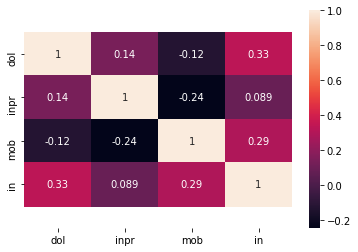

In [190]:
ax = sns.heatmap(df.corr(), annot=True)
i, k = ax.get_ylim()
ax = ax.set_ylim(i+0.5, k-0.5)

In [191]:
X = df[['dol','mob','inpr']]
y = df['in']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
from sklearn.linear_model import LinearRegression
im = LinearRegression()
im.fit(X_train, y_train)
print(im.intercept_)


38.51252569792761


In [192]:
im.coef_

array([11.34160775,  1.21940119,  2.21220925])

In [193]:
coeff_df = pd.DataFrame(im.coef_, X.columns, columns = ['count RID'])
coeff_df

,count RID
dol,11.341608
mob,1.219401
inpr,2.212209


In [194]:
y_test

6     60
1     30
8     45
2     50
12    60
14    35
22    40
Name: in, dtype: int64

In [195]:
y_pred = im.predict(X_test)
y_pred

array([58.49242905, 42.05677812, 49.79228969, 52.76759811, 52.8282516 ,
       54.46245701, 42.93575272])

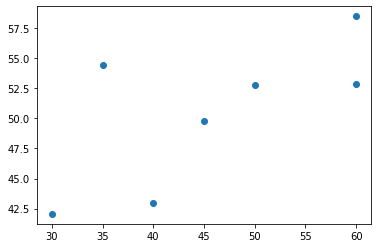

In [196]:
plt.scatter(y_test, y_pred)

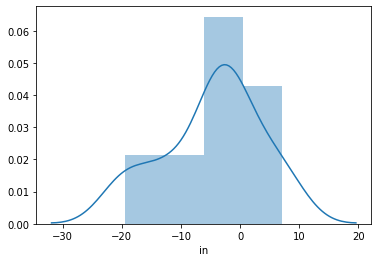

In [197]:
sns.distplot((y_test - y_pred))

In [198]:
from sklearn import metrics
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  7.242027855265063
MSE:  88.1577371848944
RMSE:  9.38923517571556
